In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats
import itertools
import seaborn as sns
%matplotlib inline

#### Choose one variable and plot that variable four different ways

In [11]:
#Dataset from Airbnb showing the listings for London (date: March 3017)
airbnb = pd.read_csv('https://raw.githubusercontent.com/borja876/Thinkful-DataScience-Borja/master/listings.csv')
df = pd.DataFrame(airbnb)

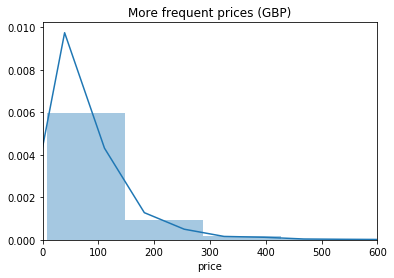

In [3]:
#Distribution of the variable price
sns.distplot(df['price'])
plt.xlim([0, 600])
plt.title('More frequent prices (GBP)')

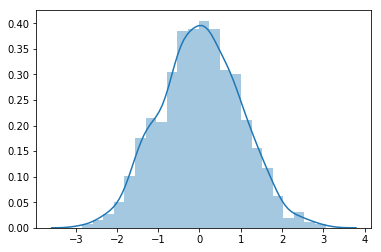

In [12]:
#A random distribution has been created and plotted
x = np.random.normal(size=1000)
sns.distplot(x)

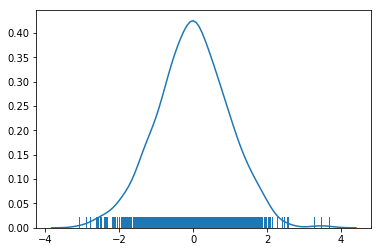

In [9]:
#Desnity function showing the bins that have been used to plot it
sns.distplot(x, hist=False, rug=True)

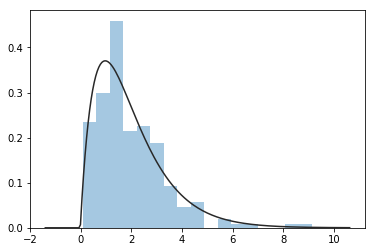

In [10]:
#Plot of a gamma distribution
x = np.random.gamma(2, size=200)
sns.distplot(x, kde=False, fit=stats.gamma)

#### Choose two continuous variables, and plot them three different ways

In [13]:
#The dataset of Airbnb has been cleaned leaving only the 4 variables that are required for plotting
df = pd.DataFrame(airbnb)
df1 = df.drop(["id", "name", "host_id", 'host_name', 'neighbourhood','neighbourhood_group', 'latitude', 'longitude', 'room_type', 'last_review', 'calculated_host_listings_count','reviews_per_month' ], axis=1)
df1.head()

,price,minimum_nights,number_of_reviews,availability_365
0,23,7,1,61
1,50,1,15,364
2,24,1,2,0
3,50,2,0,0
4,25,1,0,179


(-50, 500)

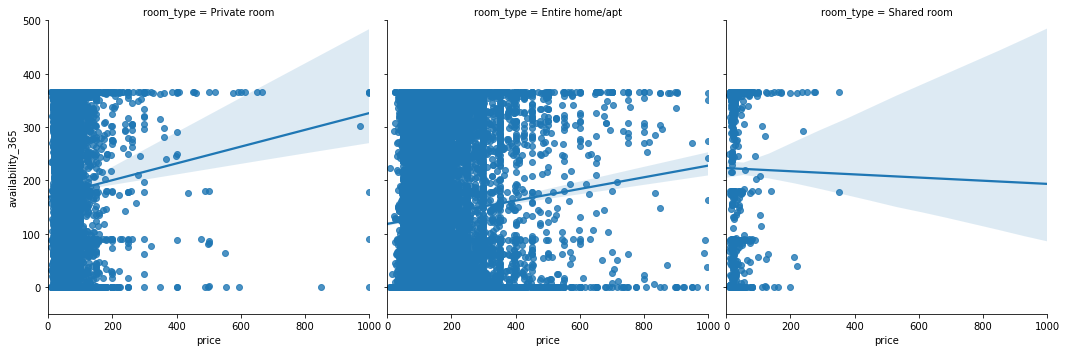

In [14]:
#Plot the relationship between availability and price
g = sns.lmplot(x="price", y="availability_365", col="room_type", data=df)
plt.xlim([0, 1000])
plt.ylim([-50, 500])

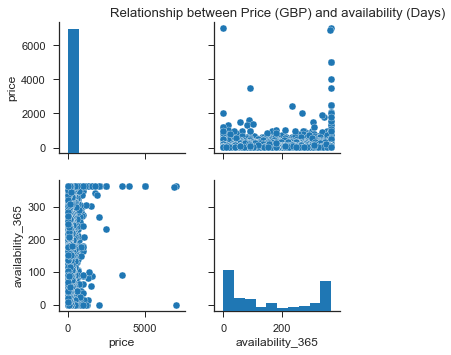

In [15]:
#Dropped the minimum nights and number of reviews to avoid problems. Plot the distributions and bivariate relation between both variables
df2 = df1.drop(['minimum_nights','number_of_reviews'], axis=1)
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.pairplot(df2)

# title
plt.title('Relationship between Price (GBP) and availability (Days)')

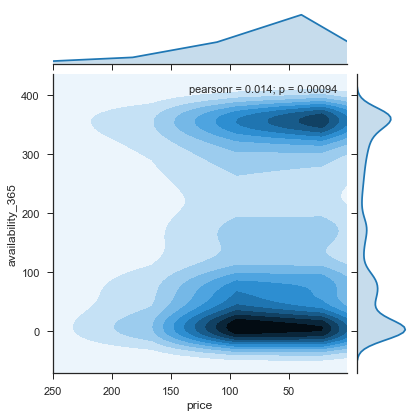

In [16]:
#Density regions for the relationship between availability and price
sns.jointplot("price", "availability_365", data=df2, xlim=250, ylim=None, kind="kde")

#### Choose one continuous variable and one categorical variable, and plot them six different ways

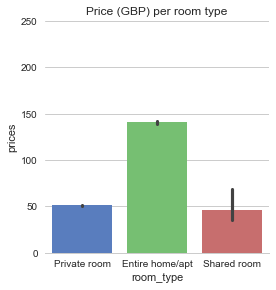

In [17]:
#Bar plot with error of the categorical variable: room type and price
sns.set(style="whitegrid")

# Draw a nested barplot to show prices per room type in Airbnb
g = sns.factorplot(x="room_type", y="price", data=airbnb, size=4, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("prices")
plt.ylim([0, 250])
plt.title('Price (GBP) per room type')

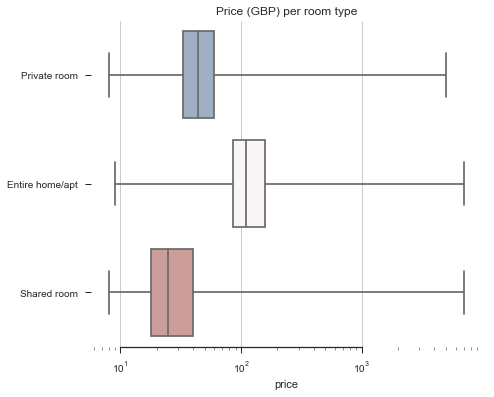

In [18]:
#Boxplot 
#Show price per room type in horizontal boxplot with log scale
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Plot the price with horizontal boxes
sns.boxplot(x="price", y="room_type", data=airbnb, whis=np.inf, palette="vlag")

# Add in points to show each observation
#sns.swarmplot(x="price", y="room_type", data=airbnb, size=2, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
plt.title('Price (GBP) per room type')

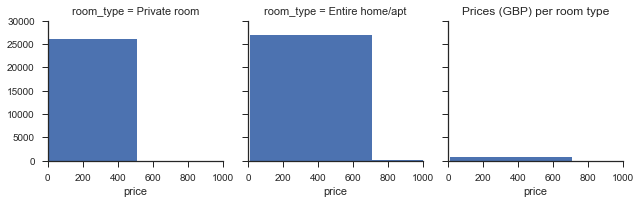

In [19]:
#Histogram to see the frequency of pricese per room type
g = sns.FacetGrid(df, col="room_type")
g.map(plt.hist, "price")
plt.xlim([0, 1000])
plt.ylim([0, 30000])
plt.title('Prices (GBP) per room type')

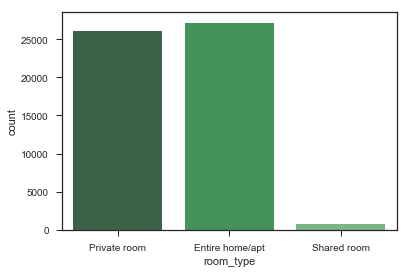

In [20]:
#Count the number of instances for each room type
sns.countplot(x="room_type", data=df, palette="Greens_d")

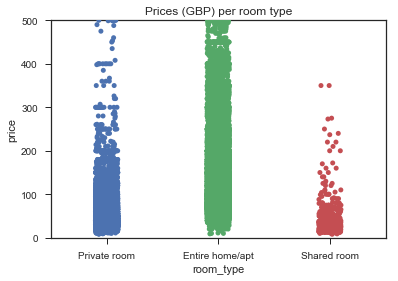

In [21]:
#Show the prices with a stripplot
sns.stripplot(x="room_type", y="price", data=df, jitter=True)
plt.ylim([0, 500])
plt.title('Prices (GBP) per room type')

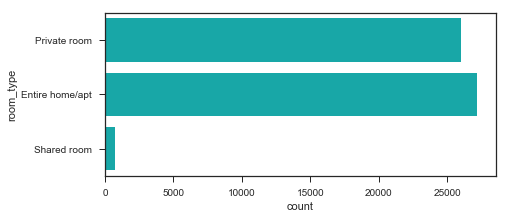

In [22]:
#Count the number of instances for each type of room with a horizontal bar plot
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="room_type", data=df, color="c")

### Challenge

In [23]:
#Clean the Airbnb dataset by dropping all the varibles that are unrelated to the challenge
df3 = df.drop(["id", "name", "host_id", 'host_name', 'neighbourhood','neighbourhood_group', 'latitude', 'longitude', 'last_review', 'calculated_host_listings_count','reviews_per_month' ], axis=1)
df3.head()

,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Private room,23,7,1,61
1,Private room,50,1,15,364
2,Private room,24,1,2,0
3,Private room,50,2,0,0
4,Private room,25,1,0,179


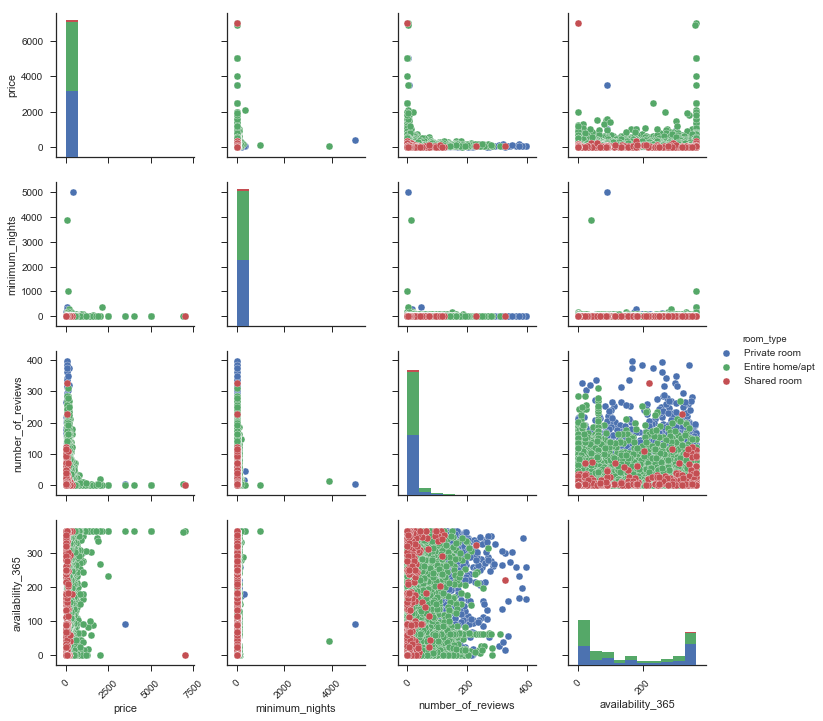

In [26]:
g = sns.pairplot(df3, hue="room_type", diag_kind="hist")  
for ax in g.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)

##### Comments
The diagonal shows the distribution of each of the variables grouped by category. As we can see except for availability 365, and the number of reviews values are grouped for the three room types around low values. Regarding availability, the values that have a higher frequency are the extreme values, either 0 or 365.
The regardin the relationship between variables number of reviews against price are higher in the case of entire rooms. Number of reviews and aviilability 365 vary in the same way for both shared and entire home. In the case of private rooms the values are more scattered, being higher than in the previous cases.